In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m0 = 150
Scu = 9.6211275e-8
Sje = 3.14159265e-8
g = 9.81
Lcu = 2007
Lje = 1928

cu = {
    'dodajanje': [(300, 35.9), (450, 36.4), (600, 37.0), (750, 37.4), (900, 37.8), (1050, 38.4), (1200, 39.0), (1350, 39.6), (1500, 42.0)],
    'odvzem': [(1350, 42.0), (1200, 41.8), (1050, 41.4), (750, 40.6), (600, 40.2), (450, 39.8), (300, 39.4), (150, 39.0)]
}

je = {
    'dodajanje': [(300, 137.4), (450, 138.0), (600, 138.6), (750, 139.2), (900, 139.8), (1050, 140.3), (1200, 140.9), (1350, 141.4), (1500, 142.0), (1650, 142.5), (1800, 143.1), (1950, 143.7), (2100, 144.3), (2250, 144.8), (2400, 145.3), (2550, 146.0), (2700, 146.4), (2850, 147.0), (3000, 147.6), (3150, 148.2), (3300, 148.7), (3450, 149.5)],
    'odvzem': [(3600, 150.1), (3450, 149.7), (3300, 148.8), (3150, 148.5), (3000, 147.9), (2850, 147.2), (2700, 146.7), (2550, 146.0), (2400, 145.6), (2250, 145.1), (2100, 144.5), (1950, 144.0), (1800, 143.3), (1650, 142.8), (1500, 142.3), (1350, 141.7), (1200, 141.2), (1050, 140.6), (900, 140.1), (750, 139.5), (600, 139.0), (450, 138.4), (300, 137.7), (150, 137.1)]
}

def normalize(l, m0, length, rev=False):
    x0 = -1
    result = []
    for i in range(len(l)):
        if x0 < 1:
            if rev: x0 = l[-1][1]
            else: x0 = l[0][1]
        result.append(((l[i][0]-m0) / 1000, (l[i][1]-x0) / length))
    return result

cu['dodajanje'] = normalize(cu['dodajanje'], m0, Lcu)
cu['odvzem'] = normalize(cu['odvzem'], m0, Lcu, rev=True)
je['dodajanje'] = normalize(je['dodajanje'], Lje, m0)
je['odvzem'] = normalize(je['odvzem'], m0, Lje, rev=True)

Ecu =  180158252.475
Ecu = 1.80158252475 * 10^8
Prekoracena je bila meja linearnosti.


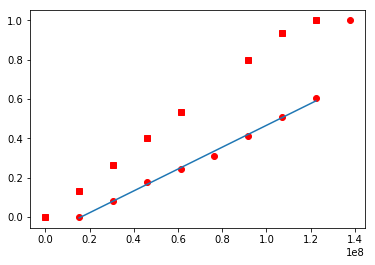

In [45]:
cux0 = [i[0]*g/Scu for i in cu['dodajanje']]
cux1 = [i[0]*g/Scu for i in cu['odvzem']]

cuy0 = [i[1]/cu['dodajanje'][-1][1] for i in cu['dodajanje']]
cuy1 = [i[1]/cu['odvzem'][0][1] for i in cu['odvzem']]

plt.plot(cux0, cuy0, 'ro')
plt.plot(cux1, cuy1, 'rs')

A = np.vstack([cux0[:-1], np.ones(len(cux0[:-1]))]).T
kcu, ncu = np.linalg.lstsq(A, cuy0[:-1])[0]
yfit = [kcu * xi + ncu for xi in cux0[:-1]]
plt.plot(cux0[:-1], yfit)

print('Ecu = ', kcu**-1)
print('Ecu =', kcu**-1/10**8, '* 10^8')
print('Prekoracena je bila meja linearnosti.')

Eje =  1007623542.57
Eje = 1.00762354257 * 10^9


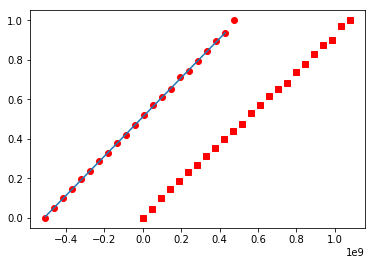

In [36]:
jex0 = [i[0]*g/Sje for i in je['dodajanje']]
jex1 = [i[0]*g/Sje for i in je['odvzem']]

jey0 = [i[1]/je['dodajanje'][-1][1] for i in je['dodajanje']]
jey1 = [i[1]/je['odvzem'][0][1] for i in je['odvzem']]

plt.plot(jex0, jey0, 'ro')
plt.plot(jex1, jey1, 'rs')

A = np.vstack([jex0[:-1], np.ones(len(jex0[:-1]))]).T
kje, nje = np.linalg.lstsq(A, jey0[:-1])[0]
yfit = [kje * xi + nje for xi in jex0[:-1]]
plt.plot(jex0[:-1], yfit)

print('Eje = ', kje**-1)
print('Eje =', kje**-1/10**9, '* 10^9')

In [39]:
meja_linearnosti_cu = cu['dodajanje'][-1][0]*g/Scu
print('meja meja linearnosti za Cu:', meja_trdnosti_cu)
print('meja meja linearnosti za Cu:', meja_trdnosti_cu/10**7, '* 10^7')

meja meja linearnosti za Cu: 137650187.04928294
meja meja linearnosti za Cu: 13.765018704928293 * 10^7


In [41]:
m_ko_se_pretrga = [2450, 2450, 2450, 2400]
m_avg = sum(m_ko_se_pretrga)/len(m_ko_se_pretrga) / 1000
meja_trdnosti_cu = m_avg*g/Scu
print('meja trdnosti za Cu:', meja_trdnosti_cu)
print('meja trdnosti za Cu:', meja_trdnosti_cu/10**8, '* 10^8')

meja trdnosti za Cu: 248535059.95009422
meja trdnosti za Cu: 2.485350599500942 * 10^8
